# 1) Текстовое описание набора данных

В качестве набора данных мы будем использовать [набор данных, содержащий информацию о результатах выполнения школьниками экзаменов в некоторых средних школах США.](https://www.kaggle.com/spscientist/students-performance-in-exams) 

Задачей анализа данных является исследование зависимости между оценками, получаемыми школьниками на экзаменах в средней школе, и разными факторами: пол, расовая принадлежность, уровень образования родителей, тип обеда в школе, уровень подготовки к экзаменам.

Набор данных состоит из файла в формате CSV: "StudentsPerformance.csv".

Каждый набор данных содержит следующие атрибуты:
   - **gender** - пол: _female_ - женский; _male_ - мужской.
   - **race/ethnicity** - раса / этническая принадлежность: _Group A_ - группа А (бушменская, негритосская, негрская и меланезийская расы); _Group B_ - группа B (эфиопская, австралийская, дравидийская и ассироидная расы); _Group C_ - группа C (индоафганская, арабская или семитская, берберская, южноевропейская, иберо-островная, западноевропейская и адриатическая расы); _Group D_ - группа D (североевропейская (нордическая) и восточноевропейская расы); _Group E_ - группа E (айносская, полинезийская, индонезийская и южноамериканская расы).
   - **parental level of education** - уровень образования родителей: _bachelor's degree_ - бакалавр; _some college_ - несколько колледжей; _master's degree_ - магистр; _associate's degree_ - младший специалист; _high school_ - средняя школа; _some high school_ - несколько средних школ.
   - **lunch** - тип обеда: _standard_ - стандартное; _free/reduced_ - бесплатное/льготное.
   - **test preparation course** - уровень подготовки к экзаменам: _completed_ - полностью; _none_ - остутствует.
   - **math score** - оценка по математике (по 100-бальной шкале).
   - **reading score** - оценка по чтению (по 100-бальной шкале).
   - **writing score** - оценка по письму (по 100-бальной шкале).

## Импорт библиотек

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Загрузка данных

In [18]:
data = pd.read_csv('data/StudentsPerformance.csv', sep=",")

# 2) Основные характеристики датасета

In [19]:
print("Первые 5 строк набора данных имеют вид:")
data.head()

Первые 5 строк набора данных имеют вид:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [20]:
row, cols = data.shape
print(f'Набор данных имеет {data.shape[0]} строк и {data.shape[1]} столбцов')

Набор данных имеет 1000 строк и 8 столбцов


In [21]:
print("Информация об атрибутах набора данных:")
data.info()

Информация об атрибутах набора данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [22]:
# Процентиль указывает значение, ниже которого падает заданный процент наблюдений в группе замеров
print('Основные статистические характеристики набора данных: count - количество строк; mean - среднее значение;\n'
     'std - стандартное отклонение; min - минимальное значение; 25%, 50%, 75% - процентили; max - максимальное значение:')
data.describe()

Основные статистические характеристики набора данных: count - количество строк; mean - среднее значение;
std - стандартное отклонение; min - минимальное значение; 25%, 50%, 75% - процентили; max - максимальное значение:


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [23]:
print('Целевой признак содержит следующие значения:')
data['lunch'].value_counts()

Целевой признак содержит следующие значения:


standard        645
free/reduced    355
Name: lunch, dtype: int64

# 3) Визуальное исследование датасета

In [24]:
# проходные баллы по математике, чтению и письму соответственно
math_pass_mark, reading_pass_mark, writing_pass_mark = 36, 40, 40

## Диаграмма рассеяния

Из диаграммы рассеяния (цел. признак - lunch) для зависимости сдачи математики от сдачи письма мы видим, что зависимость похожа на линейную. При этом оценки школьников со стандартным питанием (standard) в большинстве сконцентрированы в верхнем правом углу диаграммы, а оценки школьников со льготным питанием (free/reduced) - в нижнем.  

<AxesSubplot:title={'center':'Scatter plot'}, xlabel='reading score', ylabel='math score'>

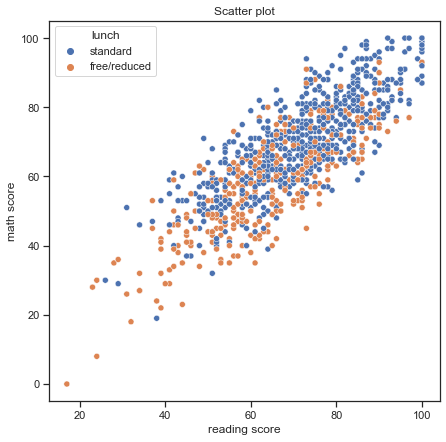

In [25]:
fig, ax = plt.subplots(figsize=(7,7)) 
plt.title("Scatter plot")
sns.scatterplot(ax=ax, x='reading score', y='math score', data=data, hue='lunch')

## Гистограмма

На гистограмме показаны результаты успешной сдачи всех экзаменов (Pass) и провале хотя бы одного эказмена (Failure) для школьников с разными типами питания.

<AxesSubplot:title={'center':'Histogram'}, xlabel='lunch', ylabel='count'>

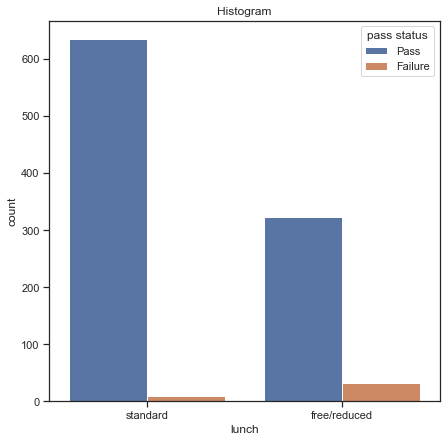

In [26]:
# создается новый атрибут, содержащий информацию об успешной сдаче всех экзаменов (Pass) или провале хотя бы одного (Failure)
data['pass status'] = np.where((data['math score']<math_pass_mark) | (data['reading score']<reading_pass_mark) | 
                               (data['writing score']<writing_pass_mark), 'Failure', 'Pass')
data['pass status'].value_counts()
fig, ax = plt.subplots(figsize=(7,7)) 
plt.title("Histogram")
sns.countplot(x = 'lunch', data = data, hue = 'pass status')

## Парные диаграммы

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

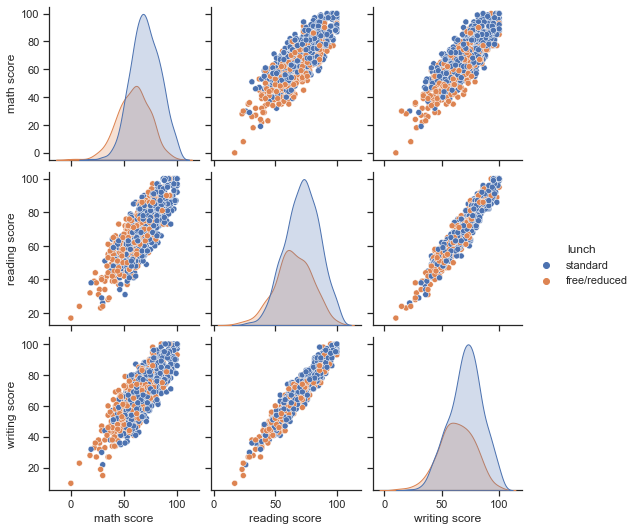

In [27]:
sns.pairplot(data, hue = "lunch")

## Ящик с усами

Представляет собой одномерное распределение вероятности.

<AxesSubplot:xlabel='lunch', ylabel='math score'>

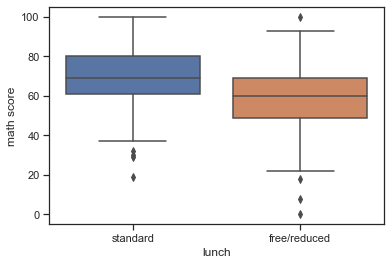

In [28]:
sns.boxplot(x=data['lunch'], y=data['math score'])

## "Скрипичная" диаграмма

От ящика с усами отличается добавлением распределения плотности.

<AxesSubplot:title={'center':'Violin Plot'}, xlabel='parental level of education', ylabel='math score'>

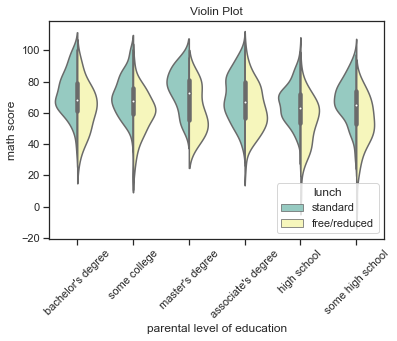

In [29]:
plt.title('Violin Plot')
plt.xticks(rotation=45)
sns.violinplot(x=data['parental level of education'], y=data['math score'], hue=data['lunch'], split=True, palette="Set3")

## Точечная диаграмма

Точечная диаграмма представляет собой оценку среднего значения для числовой переменной по положению точек диаграммы рассеяния и дает некоторое указание на неопределенность вокруг этой оценки с использованием планок ошибок. <br />В данном примере представлена диаграмма, показывающая зависимость количества баллов за экзамен по математике от рассовой принадлежности при разном типе питания.

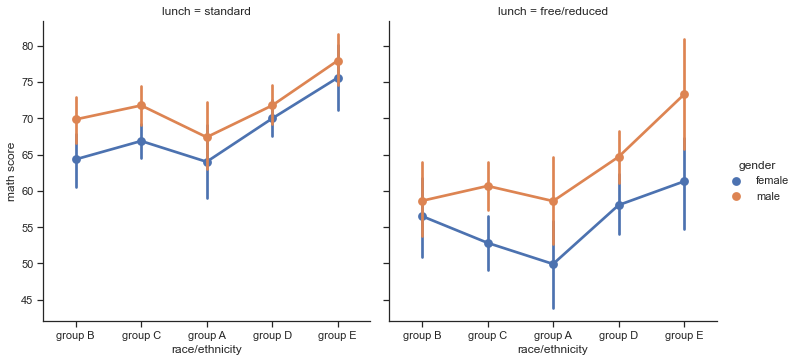

In [30]:
sns.catplot(x="race/ethnicity", y="math score", hue="gender", col='lunch', data=data, kind='point')

# 4) Информация о корреляции признаков

## Корреляционная матрица

Корреляционная матрица на основе коэффициентов корреляции Пирсона:

In [31]:
data.corr(method='pearson')

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


Корреляционная матрица на основе коэффициентов корреляции Кендалла:

In [32]:
data.corr(method='kendall')

,math score,reading score,writing score
math score,1.000000,0.617432,0.591067
reading score,0.617432,1.000000,0.820058
writing score,0.591067,0.820058,1.000000


Корреляционная матрица на основе коэффициентов корреляции Спирмена:

In [33]:
data.corr(method='spearman')

,math score,reading score,writing score
math score,1.000000,0.804064,0.778339
reading score,0.804064,1.000000,0.948953
writing score,0.778339,0.948953,1.000000


## "Тепловая карта" для визуализации корреляционной матрицы

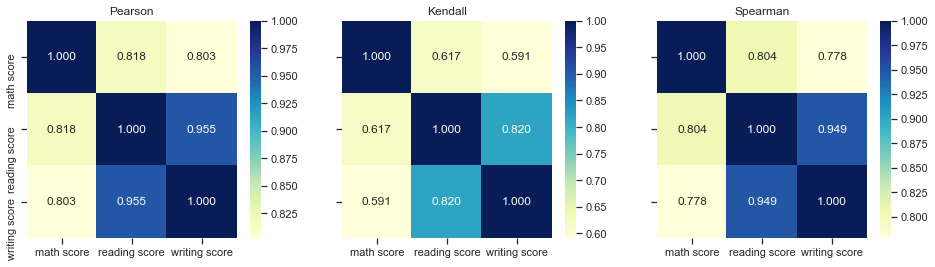

In [34]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(16,4))
sns.heatmap(data.corr(method='pearson'), cmap="YlGnBu", ax=ax[0], annot=True, fmt='.3f')
sns.heatmap(data.corr(method='kendall'), cmap="YlGnBu", ax=ax[1], annot=True, fmt='.3f')
sns.heatmap(data.corr(method='spearman'), cmap="YlGnBu", ax=ax[2], annot=True, fmt='.3f')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')